# TP1

Elaborado por: Alan Churichi

In [1]:
%load_ext lab_black

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

### Parte 1

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

In [2]:
def load_image(path, filename):
    img = cv.imread(os.path.join(path, filename))
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)


images_path = "/tf/notebooks/CEIA/computer-vision-1/tp1/assets/coord_cromaticas"

images = [
    load_image(images_path, "CoordCrom_1.png"),
    load_image(images_path, "CoordCrom_2.png"),
    load_image(images_path, "CoordCrom_3.png"),
]

In [3]:
def transform_chrom_coord(img):
    num = img.astype(np.float64)
    den = img.sum(axis=2, keepdims=True).astype(np.float64)
    transformed_img = np.divide(
        num,
        den,
        out=np.zeros_like(num),
        where=den != 0,
    )
    transformed_img *= 255 / transformed_img.max()  # Scale to 0-255
    return transformed_img.astype(np.uint8)

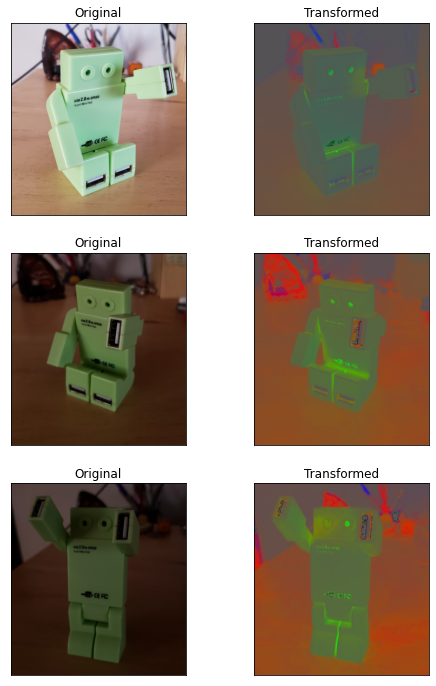

In [4]:
_, axes = plt.subplots(3, 2, figsize=(8, 12))
for i, image in enumerate(images):
    axes[i][0].imshow(image)
    axes[i][0].title.set_text("Original")
    axes[i][0].xaxis.set_visible(False)
    axes[i][0].yaxis.set_visible(False)
    axes[i][1].imshow(transform_chrom_coord(image))
    axes[i][1].title.set_text("Transformed")
    axes[i][1].xaxis.set_visible(False)
    axes[i][1].yaxis.set_visible(False)

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

In [5]:
images_path = "/tf/notebooks/CEIA/computer-vision-1/tp1/assets/white_patch"

images = [
    load_image(images_path, "test_blue.png"),
    load_image(images_path, "test_green.png"),
    load_image(images_path, "test_red.png"),
    load_image(images_path, "wp_blue.jpg"),
    load_image(images_path, "wp_green.png"),
    load_image(images_path, "wp_green3.jpg"),
    load_image(images_path, "wp_no_white.png"),
    load_image(images_path, "wp_red.png"),
    load_image(images_path, "wp_red2.jpg"),
]

In [6]:
def transform_white_patch(img):
    transformed_img = img.astype(np.float32)
    rgbMax = transformed_img.reshape(-1, 3).max(axis=0)
    if np.all(rgbMax == 255):
        warnings.warn(
            "All channels have a maximum of 255. White patch won't take effect."
        )
    transformed_img *= 255 / rgbMax  # Apply white patch algorithm
    transformed_img *= 255 / transformed_img.max()  # Scale to 0-255
    return transformed_img.astype(np.uint8)

In [7]:
def plot_white_patch(img, figsize=(10, 10)):
    _, axes = plt.subplots(1, 2, figsize=figsize)
    axes[0].imshow(img)
    axes[0].title.set_text("Original")
    axes[0].xaxis.set_visible(False)
    axes[0].yaxis.set_visible(False)
    axes[1].imshow(transform_white_patch(img))
    axes[1].title.set_text("Transformed")
    axes[1].xaxis.set_visible(False)
    axes[1].yaxis.set_visible(False)

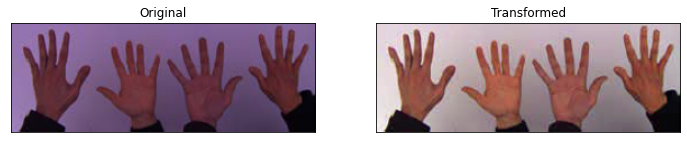

In [8]:
plot_white_patch(images[0], figsize=(12, 4))

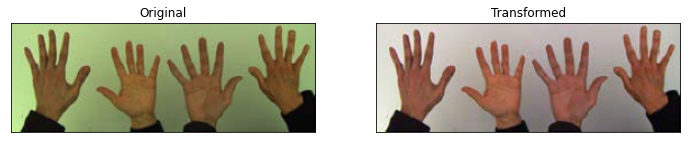

In [9]:
plot_white_patch(images[1], figsize=(12, 4))

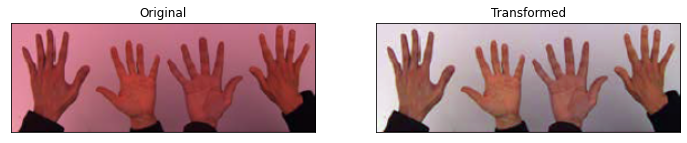

In [10]:
plot_white_patch(images[2], figsize=(12, 4))

/tmp/ipykernel_132/9001382.py:5: UserWarning: All channels have a maximum of 255. White patch won't take effect.
  warnings.warn(


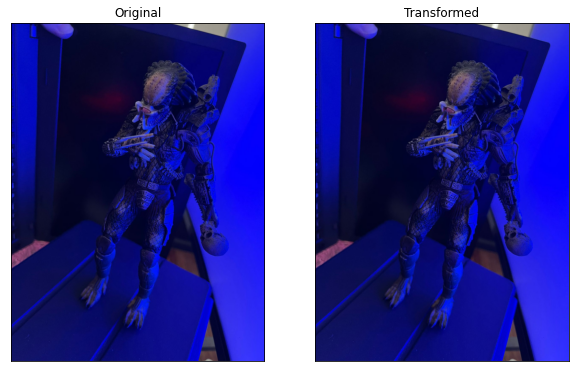

In [11]:
plot_white_patch(images[3], figsize=(10, 10))

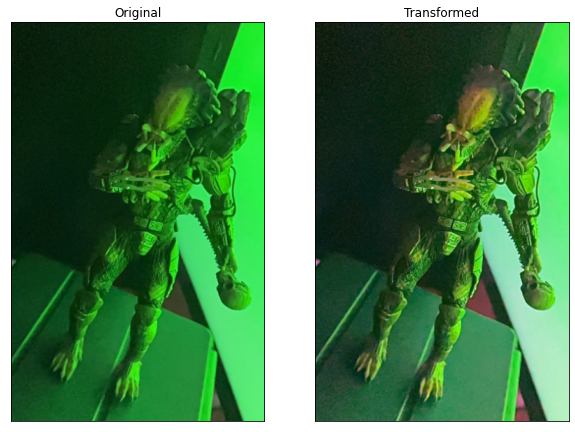

In [12]:
plot_white_patch(images[4], figsize=(10, 10))

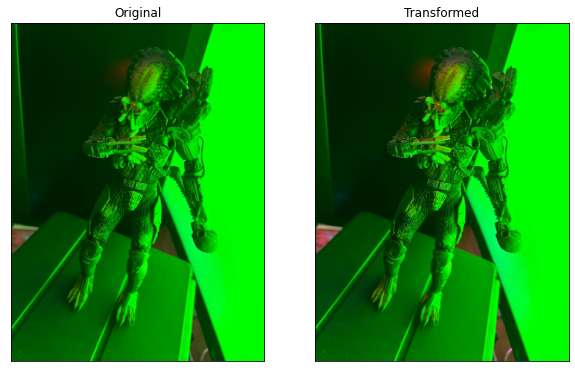

In [13]:
plot_white_patch(images[5], figsize=(10, 10))

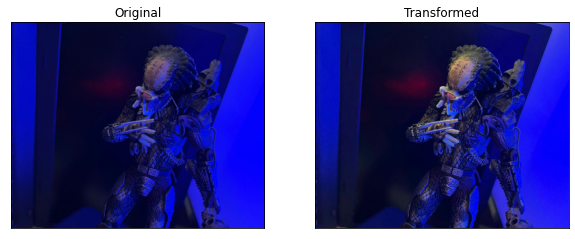

In [14]:
plot_white_patch(images[6], figsize=(10, 10))

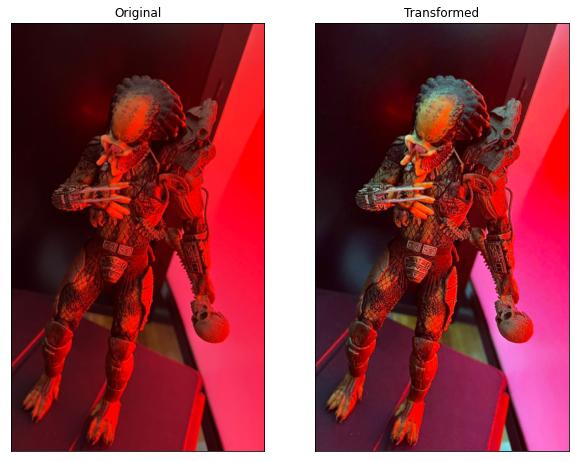

In [15]:
plot_white_patch(images[7], figsize=(10, 10))

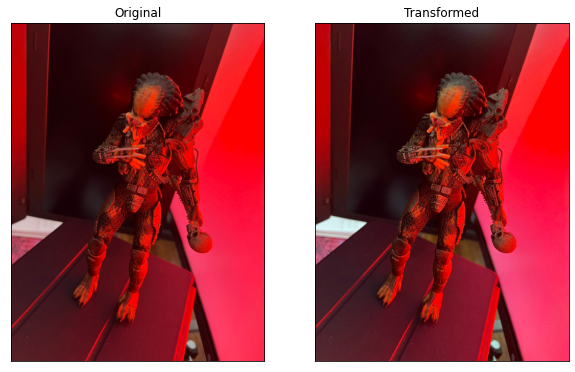

In [16]:
plot_white_patch(images[8], figsize=(10, 10))